#   **Conversion of Raster into Shapefile**

# Reading Raster

In [1]:
from osgeo import gdal, ogr, osr

In [2]:
raster = gdal.Open(r"C:\Users\Prajwal\Desktop\Internships\Symantics\EST Yield\Yield Output Raster.tif")

In [3]:
raster

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000027B4C5273C0> >

In [4]:
band = raster.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000027B4C52BEA0> >

In [5]:
band.ReadAsArray()

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

# Converting Raster into Shapefile

In [6]:
proj = raster.GetProjection()
shp_proj = osr.SpatialReference()
shp_proj.ImportFromWkt(proj)

output_file = r'C:\Users\Prajwal\Desktop\Internships\Symantics\EST Yield\Ratser to Shapefile\Output_shapefile.shp'
call_drive = ogr.GetDriverByName('ESRI Shapefile')
create_shp = call_drive.CreateDataSource(output_file)
shp_layer = create_shp.CreateLayer('layername',srs=shp_proj)
new_field = ogr.FieldDefn(str('ID'),ogr.OFTInteger)
shp_layer.CreateField(new_field)

gdal.Polygonize(band,None,shp_layer,0,[],callback = None)
create_shp.Destroy()
raster = None

# Reading Shapefile

In [7]:
import geopandas as gpd

In [8]:
shapefile = gpd.read_file(r'C:\Users\Prajwal\Desktop\Internships\Symantics\EST Yield\Ratser to Shapefile\Output_shapefile.shp')
shapefile

,ID,geometry
0,6,"POLYGON ((76.45934 18.50926, 76.45967 18.50926..."
1,5,"POLYGON ((76.45967 18.50926, 76.45999 18.50926..."
2,8,"POLYGON ((76.45999 18.50926, 76.46032 18.50926..."
3,7,"POLYGON ((76.46032 18.50926, 76.46064 18.50926..."
4,5,"POLYGON ((76.46064 18.50926, 76.46097 18.50926..."
...,...,...
97840,1,"POLYGON ((76.45869 18.30103, 76.45934 18.30103..."
97841,6,"POLYGON ((76.45804 18.30070, 76.45836 18.30070..."
97842,2,"POLYGON ((76.45901 18.30070, 76.45934 18.30070..."
97843,-9999,"POLYGON ((76.51865 18.38282, 76.51898 18.38282..."


<AxesSubplot:>

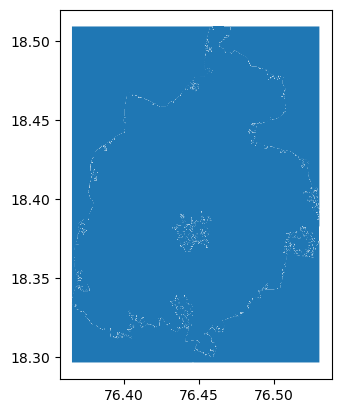

In [9]:
shapefile.plot


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

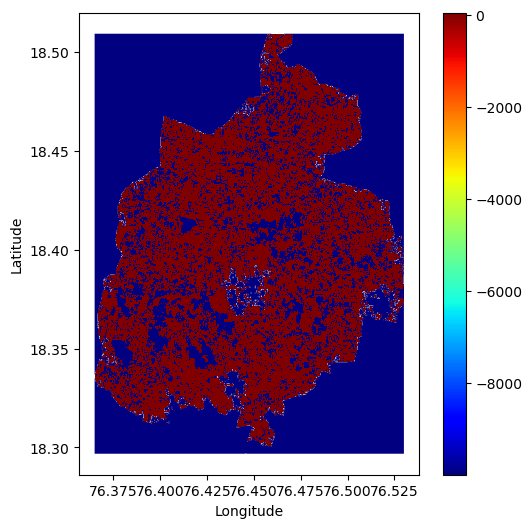

In [11]:
fig, ax = plt.subplots(1,figsize=(6,6))
shapefile.plot(ax=ax,column='ID',cmap='jet',legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()